# Project Code

---
## Open and Clean Data
---

### Packages and Modules

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

# Prices to exclude decimal points and to show all columns
pd.set_option('precision', 2)                    
pd.set_option('display.max_columns', 500)        
# default='warning signs', when adding new columns to data frames
pd.options.mode.chained_assignment = None        

### Open files

In [2]:
h_data = pd.read_csv('C:/Users/Alfredo/Desktop/github_content/price-prediction/C.-Datasets/housing_data.csv')     
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
weather_d = pd.read_csv('C:/Users/Alfredo/Desktop/github_content/price-prediction/C.-Datasets/weather_data.csv')
weather_d.head()

,STATION,STATION_NAME,DATE,MXPN,MNPN,EVAP,MDEV,DAEV,SX52,SX53,SX51,SN52,SN53,SN51,MDPR,DAPR,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,TOBS,WESD,WESF,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WDMV,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070825,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.09,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070826,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.00,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070827,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.00,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070828,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.00,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070829,-9999,-9999,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0.97,-9999.0,0.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


### Outliers or bad data

[Exploratory Data Analysis](https://github.com/AlfredMtz/price-prediction/blob/master/Ames_project/EDA-for-bad-data.ipynb)

### Homes' Data Cleaning

In [4]:
# Filtering from 2006-2009!
hs_data = h_data[(h_data.YrSold >= 2006) & (h_data.YrSold <= 2009)] 

# Remove columns/features with more than 1000 NaN values
hs_data = hs_data.dropna(axis=1, thresh=1000)

# Rename columns
hs_data = hs_data.rename(columns={"MoSold":"month", "YrSold":"year"})          

# Building dataframe to a series datetime index                                                                          
hs_data.loc[:, 'day'] = 1                                                       

# adding column as one datetime.
date = pd.to_datetime(hs_data[['year', 'month', 'day']])                        
hs_data.loc[:, 'Date'] = date
hs_data.loc[:, 'Date'] = hs_data.Date.dt.to_period('M')
                                                                                   
# Seting, sorting and renaming index
hs_data = hs_data.set_index('Date').sort_index()                               
hs_data.drop(['day'], axis=1, inplace=True)

# changing/rename index to string object for later joining
hs_data.index = hs_data.index.map(str).rename('Year_Month')

### Weather's Data Cleaning

In [5]:
# Sorting to data needed
weather_d1 = weather_d[weather_d.STATION_NAME == 'AMES 8 WSW IA US']                   
weather_d2 = weather_d1[(weather_d1.DATE >= 20060101) & (weather_d1.DATE <= 20091231)]
weather_d3 = weather_d2[['DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]

 # Getting date to datetime, setting and sortinging index to ('Date')
weather_d3.loc[:, 'Date'] = pd.to_datetime(weather_d3.DATE, format='%Y%m%d')           
weather_d4 = weather_d3[['Date', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]                      

# Building and setting index to year, and month.
weather_d4['Date'] =weather_d4.Date.dt.to_period('M')                                   
weather_data = weather_d4.set_index('Date').sort_index()                                 

# Changed corrupted values to Not a Number(NaN)
weather_data[weather_data == -9999] = np.nan                                   

# Changed names for columns
col = ['Avg_Prcp', 'Avg_Snow', 'Avg_Tmax', 'Avg_Tmin']                          
weather_data.columns = col

# Getting weather averages
wth_data_avg = weather_data.groupby(weather_data.index).mean()                 

# Change index type to string object for later merging of dataframes
wth_data_avg.index = wth_data_avg.index.map(str).rename('Year_Month') 

### Join Homes' and Weather's Data

In [6]:
# join new housing and weather dataframes
hs_wth_data = hs_data.join(wth_data_avg)

# changing index to dates
hs_wth_df = hs_wth_data.reset_index(level=['Year_Month'])

# Drop 'Id' column, not needed
data = hs_wth_df.drop('Id', 1)
data.head()

,Year_Month,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,month,year,SaleType,SaleCondition,SalePrice,Avg_Prcp,Avg_Snow,Avg_Tmax,Avg_Tmin
0,2006-01,20,RL,NaN,10659,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,915,Unf,0,135,1050,GasA,TA,Y,SBrkr,1050,0,0,1050,1,0,1,0,3,1,TA,6,Typ,0,Attchd,1961.0,Unf,1,368,TA,TA,Y,0,319,0,0,0,0,0,1,2006,COD,Normal,136500,0.02,0.06,41.42,25.84
1,2006-01,20,RL,118.0,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,0,1,2006,WD,Normal,205000,0.02,0.06,41.42,25.84
2,2006-01,20,RL,49.0,20896,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,Y,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Attchd,2005.0,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,0,1,2006,New,Partial,423000,0.02,0.06,41.42,25.84
3,2006-01,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1686,1686,GasA,TA,Y,SBrkr,1707,0,0,1707,0,0,2,1,2,1,TA,6,Typ,1,Attchd,1981.0,RFn,2,511,TA,TA,Y,574,64,0,0,0,0,0,1,2006,WD,Normal,228000,0.02,0.06,41.42,25.84
4,2006-01,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,0,1,2006,WD,Normal,181000,0.02,0.06,41.42,25.84


---
## Modeling
---

### Packages and Modules

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV     
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error

### Data Split

In [8]:
# Value drop
X, y = data.drop(['Year_Month', 'SalePrice'], axis=1), data.SalePrice

# Data split
X_trainp, X_testp, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 5)

print(X_trainp.shape)
print(X_testp.shape)
print(y_train.shape)
print(y_test.shape)

(899, 78)
(386, 78)
(899,)
(386,)


## Fill not a number(NaN) with values for X_train

In [9]:
# Fix values for X_train

# Fill float(numerical) columns' NaN values with means
X_trainp[['LotFrontage', 'MasVnrArea','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']] = X_trainp[
    ['LotFrontage', 'MasVnrArea','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']].fillna(
    X_trainp[['LotFrontage', 'MasVnrArea','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']].mean())

# Fill int(numerical) columns' NaN values with mode, most frequent
X_trainp[['GarageYrBlt','BsmtFullBath','BsmtHalfBath', 'GarageCars']] = X_trainp[
    ['GarageYrBlt','BsmtFullBath','BsmtHalfBath', 'GarageCars']].fillna(
    X_trainp[['GarageYrBlt','BsmtFullBath','BsmtHalfBath', 'GarageCars']].mode().iloc[0])

# find categorical features
#categorical_features = attach_all_data.select_dtypes(include=['object'])

# Fill categorical columns' NaN values with mode, most frequent
X_trainp[['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
            ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
            ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
            ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType'
            ,'SaleCondition']] = X_trainp[['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig'
            ,'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
            ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
            ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
            ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType'
            ,'SaleCondition']].fillna(X_trainp[['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig'
            ,'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
            ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
            ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
            ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType'
            ,'SaleCondition']].mode().iloc[0])

X_train_dummies = pd.get_dummies(X_trainp)
X_train = X_train_dummies
X_train.shape

(899, 268)

## Fill not a number(NaN) with values for X_test

In [10]:
# Fix values for X_test 

# Fill float columns' NaN values with means
X_testp[['LotFrontage', 'MasVnrArea','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']] = X_testp[
    ['LotFrontage', 'MasVnrArea','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']].fillna(
    X_trainp[['LotFrontage', 'MasVnrArea','GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']].mean())

# Fill int columns' NaN values with mode, most frequent
X_testp[['GarageYrBlt','BsmtFullBath','BsmtHalfBath', 'GarageCars']] = X_testp[
    ['GarageYrBlt','BsmtFullBath','BsmtHalfBath', 'GarageCars']].fillna(
    X_trainp[['GarageYrBlt','BsmtFullBath','BsmtHalfBath', 'GarageCars']].mode().iloc[0])

# Fill categorical columns' NaN values with mode, most frequent
X_testp[['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig'
            ,'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
            ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
            ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
            ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType'
            ,'SaleCondition']] = X_testp[['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig'
            ,'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
            ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
            ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
            ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType'
            ,'SaleCondition']].fillna(X_trainp[['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig'
            ,'LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl'
            ,'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond'
            ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
            ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType'
            ,'SaleCondition']].mode().iloc[0])

X_test_dummies = pd.get_dummies(X_testp)
X_test = X_test_dummies.reindex(columns = X_train_dummies.columns).fillna(0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(899, 268)
(386, 268)
(899,)
(386,)


## Comparing Models

### 1. Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_mse = mean_squared_error(y_pred, y_test)
Lin_rmse = sqrt(lin_mse)

### 2. Random Forest Regression

In [12]:
# Calls the Random Forest Regressor Algorithm and sets random_state
# to '0' to keep obtaining same results for future analysis of model
model = RandomForestRegressor(random_state = 0)

# Range of different parameters, try to find the bests between these.
param_grid = {'n_estimators': [50, 100, 250, 300],
             'max_features' : ["auto", "sqrt"],
             'max_depth'    : [2,4,8],
             "bootstrap"    : [True, False],
             "min_samples_leaf": [1,4,6]}

# Search for previous specify parameters, within the given estimator RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# Build a forest of trees from the training set (X_train, y_train)
grid.fit(X_train, y_train)

# predicting values for our X_test data
y_predict = grid.best_estimator_.predict(X_test)
#print(grid.best_estimator_)

MSE = mean_squared_error(y_test, y_predict)
RF_rmse = sqrt(MSE)

### 3. Gradient Boosting Regression

In [13]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
GBmodel = ensemble.GradientBoostingRegressor(random_state = 0)
GBmodel.fit(X_train, y_train)

y_predt = GBmodel.predict(X_test)
model_mse = mean_squared_error(y_predt, y_test)
GB_model_rmse = sqrt(model_mse)

## Performance

In [14]:
print('Liner Regression RMSE: %.4f' % Lin_rmse)
print('Random Forest Regression RMSE: %.4f' % RF_rmse)
print('Gradient Boosting Regression RMSE: %.4f' % GB_model_rmse)

Liner Regression RMSE: 42605.2337
Random Forest Regression RMSE: 30084.3291
Gradient Boosting Regression RMSE: 27161.7518


---
# Visual Results
---

### Random Forest Regression 

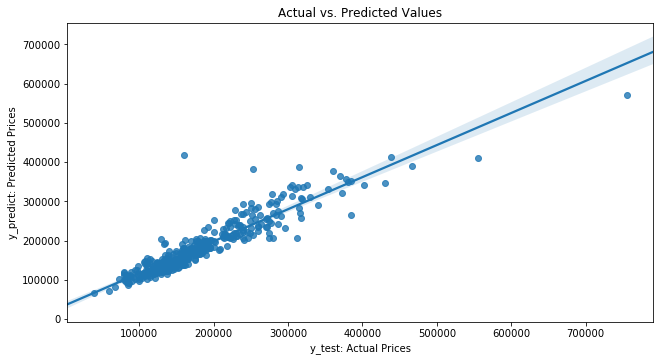

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5)
ax = sns.regplot(y_test, y_predict)
ax.set_title('Actual vs. Predicted Values')
ax.set_xlabel('y_test: Actual Prices')
ax.set_ylabel('y_predict: Predicted Prices')
plt.show()

## Feature Importance Table

In [16]:
pd.set_option('display.precision',3)
rfr_bp = grid.best_estimator_.fit(X_train, y_train)
result = pd.DataFrame(list(zip(X_train.columns,  rfr_bp.feature_importances_)), columns=['Features', 'Importance'])
results = result.sort_values('Importance', ascending=False)
results.head(10)

,Features,Importance
3,OverallQual,0.555
15,GrLivArea,0.155
11,TotalBsmtSF,0.051
8,BsmtFinSF1,0.023
13,2ndFlrSF,0.020
2,LotArea,0.016
12,1stFlrSF,0.014
26,GarageArea,0.013
6,YearRemodAdd,0.011
25,GarageCars,0.009


## Feature Importance Bar Chart

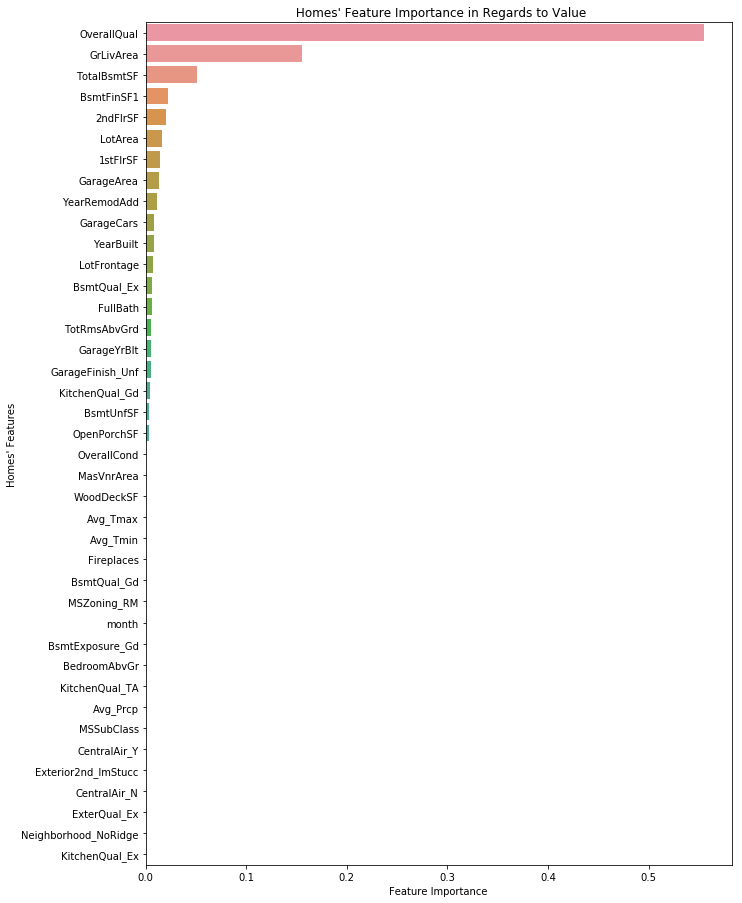

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 15.5)
sns.barplot(results['Importance'][:20], results['Features'][:40])
ax.set_title(" Homes' Feature Importance in Regards to Value")
ax.set_xlabel('Feature Importance')
ax.set_ylabel("Homes' Features")
plt.show()

---
Alfredo M. ☺️